<a href="https://colab.research.google.com/github/IngridSchieven/Final-assignment---CO2-emissions---Ingrid/blob/main/FA_Q2_CO2_Biggest_strides_decreasing_0722Ingrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Final Assignment 
# Q2 Which countries are making the biggest strides in decreasing CO2 output?

# 2: Biggest strides in decreasing CO2 output
# You'll need to find the relative CO2 output for each country to be able to calculate this. 
# But countries can have growing and shrinking populations too, so it's probably a good idea to take this into account as well.


In [ ]:
# Stap 1: Onderzoeksvraag begrijpen en indien nodig aanvullende info zoeken

In [ ]:
# Stap 2: Relevante dataset zoeken!
# Shortlist datasets: 
url2 = 'https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions'
url3 = 'https://ourworldindata.org/grapher/co-emissions-per-capita' 
url4 = 'https://ourworldindata.org/share-co2-emissions' #zie emissions above or below the global average
url5 = 'https://ourworldindata.org/grapher/consumption-kaya-identity?country=~GBR'  #kaya identity 
# Percentage change in the four parameters of the Kaya Identity, which determine total CO₂ emissions. 
# Consumption-based metrics adjust for the energy or emissions embedded in traded goods: 
# it is the energy or emissions used domestically minus exported goods; plus the energy or emissions from imported goods.

#verder zoeken naar relevante data! #inwoners aantallen 
url6 = 'https://ourworldindata.org/world-population-growth'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
#dataset emmisions per capita houdt ook rekening met populatiegroei
df = pd.read_csv('/content/co-emissions-per-capita.csv')
df

,Entity,Code,Year,Annual CO2 emissions (per capita)
0,Afghanistan,AFG,1949,0.0019
1,Afghanistan,AFG,1950,0.0109
2,Afghanistan,AFG,1951,0.0117
3,Afghanistan,AFG,1952,0.0115
4,Afghanistan,AFG,1953,0.0132
...,...,...,...,...
24027,Zimbabwe,ZWE,2016,0.7653
24028,Zimbabwe,ZWE,2017,0.6730
24029,Zimbabwe,ZWE,2018,0.8210
24030,Zimbabwe,ZWE,2019,0.7476


In [ ]:
#exploring the dataset
df.info()

In [ ]:
# Quick overview of missing data:
for column in df.columns:
    aantal_missing = np.sum(df[column].isnull())
    print('{} - {}'.format(column, aantal_missing))

In [ ]:
#Keuze gemaakt: just looking at te last 20 years! 2000 - 2020
df2000_em = df.loc[df.Year > 1999]
#cleanup dataset
#drop columns
df2000_em = df2000_em.drop(columns=['Code'])
df2000_em.head(25)

,Entity,Year,Annual CO2 emissions (per capita)
51,Afghanistan,2000,0.0365
52,Afghanistan,2001,0.0369
53,Afghanistan,2002,0.0465
54,Afghanistan,2003,0.0501
55,Afghanistan,2004,0.0360
56,Afghanistan,2005,0.0508
57,Afghanistan,2006,0.0619
58,Afghanistan,2007,0.0837
59,Afghanistan,2008,0.1515
60,Afghanistan,2009,0.2374


In [ ]:
#make pivot
#pivot df
df2000_em_2 = df2000_em.pivot(index = 'Entity', columns='Year', values='Annual CO2 emissions (per capita)')
df2000_em_2.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0365,0.0369,0.0465,0.0501,0.0360,0.0508,0.0619,0.0837,0.1515,0.2374,...,0.4020,0.3279,0.2616,0.2330,0.2297,0.1906,0.1890,0.2245,0.3193,0.3124
Africa,1.0936,1.0645,1.0489,1.1094,1.1603,1.1547,1.1613,1.1763,1.1968,1.1762,...,1.1809,1.1456,1.1227,1.1837,1.1191,1.1189,1.1131,1.0865,1.0772,0.9896
Albania,0.9601,1.0291,1.1990,1.3572,1.3217,1.3603,1.2548,1.2620,1.4228,1.4308,...,1.7178,1.6018,1.6971,1.9406,1.5553,1.5563,1.8382,1.6422,1.6882,1.5757
Algeria,2.6487,2.6638,2.8067,2.8220,2.6873,3.2119,2.9786,3.1727,3.1394,3.4014,...,3.2679,3.4269,3.4723,3.6617,3.7677,3.6726,3.7434,3.8241,3.8706,3.5346
Andorra,8.0127,7.7802,7.5845,7.3100,7.3520,7.2935,6.7404,6.5142,6.4227,6.1167,...,5.8625,5.9120,5.8972,5.8281,5.9663,6.0676,6.0435,6.4232,6.5052,6.0350


In [ ]:
#selecting year 2000, 2010 and 2020
years = [2000, 2005, 2010, 2015, 2020]
df2000_2020_emissions = df[df.Year.isin(years) == True]
df_em_3 = df2000_2020_emissions.dropna() #dropna() - Africa, Asia etc verwijderen
df_em_3.head(25)

In [ ]:
#pivot df
df_em_4 = df_em_3.pivot(index = 'Entity', columns='Year', values='Annual CO2 emissions (per capita)')
df_em_4.head(15)

In [ ]:
#add column relatieve verandering - %
df_em_4['%_change_2000_2020'] = df_em_4[2020]/df_em_4[2000] * 100
df_em_4.head(15)

In [ ]:
#sort on Emissions change decrease top 10 countries
df_em_4.sort_values('%_change_2000_2020', ascending = True).head(10)

In [ ]:
top10_biggeststrides_em = df_em_4.sort_values('%_change_2000_2020', ascending = True).head(10)
#further cleanup
#rename columns (because integer 2000 gives often a error)
top10 = top10_biggeststrides_em.rename(columns= {2000: 'Em_2000', 2005: 'Em_2005', 2010:'Em_2010', 2015: 'Em_2015', 2020: 'Em_2020', '%_change_2000_2020': '%_Em_change'})
top10

Year,Em_2000,Em_2005,Em_2010,Em_2015,Em_2020,%_Em_change
Entity,,,,,,
Aruba,26.1697,27.1793,24.6513,8.6035,7.0548,26.957894
North Korea,3.0165,3.1342,2.0377,0.9777,1.1370,37.692690
Yemen,0.8315,0.9844,0.9998,0.4833,0.3275,39.386651
United Arab Emirates,35.6684,24.9503,21.1253,23.3818,15.1933,42.595967
Denmark,10.1647,9.5001,8.8518,6.1884,4.5224,44.491229
Venezuela,6.2776,6.1978,6.4727,5.9878,2.9754,47.397094
United Kingdom,9.6326,9.4540,8.0623,6.4127,4.8549,50.400723
Gabon,3.8007,3.4942,2.9451,2.7055,1.9311,50.809061
Macao,3.8116,3.7864,2.2942,3.3682,1.9447,51.020569


In [ ]:
#make a plot 
#firts delete columnn %
top10_1 = top10_biggeststrides_em.drop(columns=['%_change_2000_2020'])

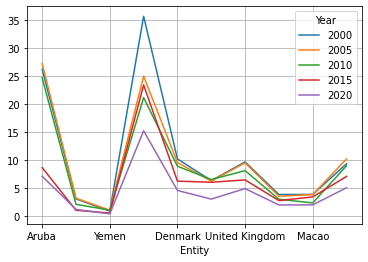

In [ ]:
top10_1.plot()
plt.grid()

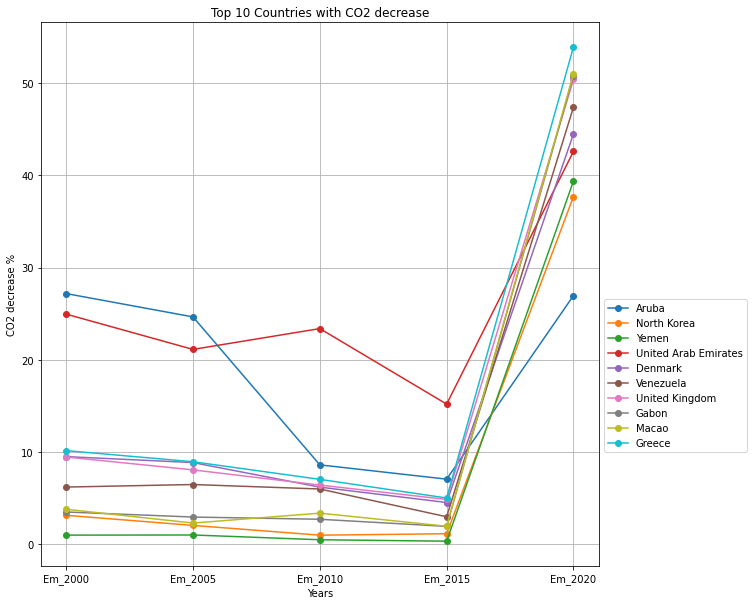

In [ ]:
#improve plot above
from IPython.core.pylabtools import figsize

fig, ax = plt.subplots(figsize=(10,10))

years = ['Em_2000', 'Em_2005', 'Em_2010', 'Em_2015', 'Em_2020'] 

for index, row in top10.iterrows():
  plt.plot(years, row[1:], 'o-', label=row[:0].name) #rij 1 t/m 10 > 1: of 1:9
plt.grid()
plt.title('Top 10 Countries with CO2 decrease')
plt.xlabel('Years')
plt.ylabel('CO2 decrease %') 
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#NB Year 2015 Paris Argreement (climatchange)
Url = https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement
Url2 = https://www.un.org/en/climatechange/paris-agreement

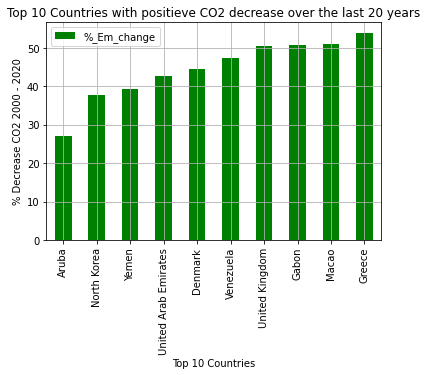

In [ ]:
#Visualation top 10 decrease :
top10.plot(kind='bar', y = '%_Em_change', color='green')
plt.title('Top 10 Countries with positieve CO2 decrease over the last 20 years')
plt.ylabel('% Decrease CO2 2000 - 2020')
plt.xlabel('Top 10 Countries')
plt.grid()

In [ ]:
#conclusion
# plot X shows that there are several countries doeing a good job by increasing there CO2 output.
# because the used (URL invoegen )dataset takes into account the numbers per capita the outcome is reliable, 
# although a number of small countries are also visible in the top 10. Like Aruba, Gabon and Macao. Maybe a further investigation is needed. 
# Looking at the research question, fig X gives the correct answer. So at the moment no further investigation is needed. 